# Fashion MNIST

submission by

Utpalraj Kemprai (MDS202352)

Monsey


In [1]:
# importing the libraries needed
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from sklearn.cluster import KMeans

### Loading the data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

### Checking shape and data type

In [3]:
X_train.shape

(55000, 28, 28)

In [4]:
type(X_train)

numpy.ndarray

### Labels of the data

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Sample images from dataset

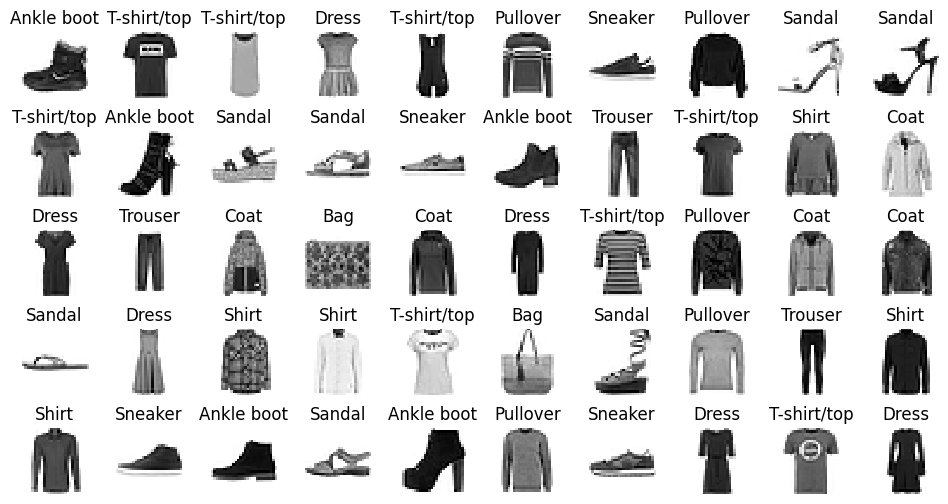

In [6]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Checking value counts of training and test data

In [7]:
pd.Series(y_train_full).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

In [8]:
pd.Series(y_test).value_counts()

9    1000
2    1000
1    1000
6    1000
4    1000
5    1000
7    1000
3    1000
8    1000
0    1000
Name: count, dtype: int64

### Functions for Seeding classification process using kmeans clustering

In [9]:
from operator import itemgetter

def seed_classification_full_clusters(k = 20):
    '''
    returns the whole training data with each image 
    labelled the same as the point closest  to the center
    of the cluster to which it belongs
    '''
    # flatten the data as 2d array
    X_train_flatten = X_train.reshape(55000,784)
    # Fit kmeans to the flatten data
    kmeans = KMeans(n_clusters=k,tol = 1e-1).fit(X_train_flatten)
    l = {}
    # find labels for each of the k clusters
    for i in range(k):
        l[i] = y_train[np.argmin([np.linalg.norm(kmeans.cluster_centers_[i]-j) for j in X_train.reshape(55000,784)])]
    pred_labels = {}
    # label each training data as per the cluster they belong to
    for i in range(len(y_train)):
        pred_labels[i] = l[kmeans.labels_[i]]
    return X_train_flatten, pred_labels.values()


def seed_classification_part(k = 20,per = 0.20):
    '''
    returns 100*per % of the training data with labels
    by labelling 100*per % closest point of each cluster to
    the center the same as the point in the cluster closest
    to the center
    '''
    # flatten the data to a 2d array
    X_train_flatten = X_train.reshape(55000,784)
    # Fit Kmeans
    kmeans = KMeans(n_clusters=k,tol=1e-1).fit(X_train_flatten)
    l = {}
    out = {}
    # find labels for centers of each cluster
    for i in range(k):
        l[i] = y_train[np.argmin([np.linalg.norm(kmeans.cluster_centers_[i]-j) for j in X_train_flatten])]
    n = len(y_train)
    # the 100 per % closest points of each cluster with the same label as their center's label
    # is computed and return
    for i in range(k):
        dist = {}
        for j in range(n):
            dist[j] = np.linalg.norm(X_train_flatten[j] - kmeans.cluster_centers_[kmeans.labels_[j]])
        dist = dict(sorted(dist.items(), key = itemgetter(1))[:int(per*len(dist))])
        for point in dist.keys():
            out[point] = l[kmeans.labels_[point]] 
    X_pre = X_train_flatten[list(out.keys())]
    labels = out.values()
    return X_pre,labels


def seed_classification_centers(k = 20):
    '''
    returns the centers of each cluster and labels
    them the same as the point closest to them
    '''
    out = {}
    # flatten the data
    X_train_flatten = X_train.reshape(55000,784)
    # Fit KMeans
    kmeans = KMeans(n_clusters=k,tol=1e-1).fit(X_train_flatten)
    # Find the labels for each cluster centers
    for i in range(k):
        ind = np.argmin([np.linalg.norm(kmeans.cluster_centers_[i]-j) for j in X_train_flatten])
        l = y_train[ind]
        out[ind] = l
    # Return the points closest to each cluster centers along 
    # with their labels
    x_pre = X_train_flatten[list(out.keys())]
    labels = out.values()
    return x_pre,labels
# write alternate versions of above code for other cases to seed classification

### Creating the model using the Sequential API

In [10]:
# keras.backend.clear_session()

In [11]:
def create_model():
    tf.random.set_seed(42)
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(shape=[28, 28]))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(300, activation="relu"))
    model.add(keras.layers.Dense(100, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    return model

In [12]:
tf.random.set_seed(42)
model = keras.Sequential()
model.add(keras.layers.InputLayer(shape=[28, 28]))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

##### Compiling the model

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="adam",
metrics=["accuracy"])

In [16]:
X_train,X_valid,X_test = X_train/255,X_valid/255,X_test/255

### Performance by training using the whole training data (with given labels)

In [17]:
history = model.fit(X_train, y_train, epochs=20,batch_size=2000,
    validation_data=(X_valid, y_valid))

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.5606 - loss: 1.3862 - val_accuracy: 0.7988 - val_loss: 0.5631
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8150 - loss: 0.5429 - val_accuracy: 0.8396 - val_loss: 0.4564
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8406 - loss: 0.4619 - val_accuracy: 0.8444 - val_loss: 0.4290
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8552 - loss: 0.4214 - val_accuracy: 0.8566 - val_loss: 0.3978
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8640 - loss: 0.3933 - val_accuracy: 0.8622 - val_loss: 0.3849
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8702 - loss: 0.3757 - val_accuracy: 0.8664 - val_loss: 0.3750
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8749 - loss: 0.3585 - val_accuracy: 0.8710 - val_loss: 0.3615
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8802 - loss: 0.3422 - val_accuracy: 0.8714 - v

In [18]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8856 - loss: 0.3296


[0.3315630257129669, 0.8841000199317932]

### Training with 50 samples

In [19]:
model = create_model()
model.compile(loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])
history = model.fit(X_train[:50], y_train[:50], epochs=20,batch_size=50,
validation_data=(X_valid, y_valid))

Epoch 1/20


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1600 - loss: 2.3034 - val_accuracy: 0.2904 - val_loss: 2.0384
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step - accuracy: 0.4600 - loss: 1.8727 - val_accuracy: 0.4320 - val_loss: 1.8690
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step - accuracy: 0.7200 - loss: 1.5928 - val_accuracy: 0.4810 - val_loss: 1.7355
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step - accuracy: 0.7600 - loss: 1.3662 - val_accuracy: 0.4992 - val_loss: 1.6119
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - accuracy: 0.8000 - loss: 1.1636 - val_accuracy: 0.5158 - val_loss: 1.4958
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step - accuracy: 0.8200 - loss: 0.9883 - val_accuracy: 0.5346 - val_loss: 1.3798
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step - accuracy: 0.8400 - loss: 0.8326 - val_accuracy: 0.5798 - val_loss: 1.2691
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step - accuracy: 0.9000 - loss: 0.7026 - val_accuracy: 0.6234 - val_loss: 1.1711
Epoch 

In [20]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6594 - loss: 1.0918


[1.0931086540222168, 0.6593999862670898]

### Performance with labels from Kmeans clsutering

In [21]:
from tqdm import tqdm

##### Propagate label of point closest to cluster to whole cluster

In [22]:
full = {}

In [23]:
for k in tqdm([10,20,30,40,50,60,70,80,90,100]):
    X_pred , labels = seed_classification_full_clusters(k)
    model = create_model()
    model.compile(loss="sparse_categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"])
    history = model.fit(X_pred.reshape(55000,28,28), np.array(list(labels)), epochs=30,
    batch_size = 1000,verbose = 0,
    validation_data=(X_valid, y_valid))
    full[k] = model.evaluate(X_test,y_test,verbose = 0)[1]

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [13:03<00:00, 78.33s/it]


Performance for different values of K

In [24]:
pd.DataFrame(zip(full.keys(),full.values()),columns=['K','Accuracy'],index = range(1,len(full)+1))

,K,Accuracy
1,10,0.5136
2,20,0.5862
3,30,0.6337
4,40,0.6161
5,50,0.6450
6,60,0.6440
7,70,0.6538
8,80,0.6741
9,90,0.6656
10,100,0.6906


##### Train only using points closest to centers of each cluster 

In [25]:
centers = {}

In [27]:
for k in tqdm([10,20,30,40,50,60,70,80,90,100]):
    X_pred , labels = seed_classification_centers(k)
    model = create_model()
    model.compile(loss="sparse_categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"])
    history = model.fit(X_pred.reshape(len(labels),28,28), np.array(list(labels)), epochs=30,
    batch_size = 2000,verbose = 0,
    validation_data=(X_valid, y_valid))
    centers[k] = model.evaluate(X_test,y_test,verbose = 0)[1]

100%|██████████| 10/10 [07:46<00:00, 46.63s/it]


Performance for different values of K

In [28]:
pd.DataFrame(zip(centers.keys(),centers.values()),columns=['K','Accuracy'],index = range(1,len(centers)+1))

,K,Accuracy
1,10,0.4510
2,20,0.6242
3,30,0.6396
4,40,0.6111
5,50,0.6484
6,60,0.6604
7,70,0.6614
8,80,0.6976
9,90,0.7100
10,100,0.7230


##### Propagate label of point closest to cluster to top k% closest points to cluster center

In [29]:
part = {}

In [30]:
for k in tqdm([10,20,30,40,50,60,70,80,90,100]):
    X_pred , labels = seed_classification_part(k,0.25)
    model = create_model()
    model.compile(loss="sparse_categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"])
    history = model.fit(X_pred.reshape(len(labels),28,28), np.array(list(labels)), epochs=30,
    batch_size = 10000,verbose = 0,
    validation_data=(X_valid, y_valid))
    part[k] = model.evaluate(X_test,y_test,verbose =0)[1]

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [13:39<00:00, 81.95s/it] 


Performance for different values of K

In [31]:
pd.DataFrame(zip(part.keys(),part.values()),columns=['K','Accuracy'],index = range(1,len(part)+1))

,K,Accuracy
1,10,0.3851
2,20,0.5524
3,30,0.5831
4,40,0.5984
5,50,0.5776
6,60,0.6096
7,70,0.6401
8,80,0.6440
9,90,0.6392
10,100,0.6778
